In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
####################################################
# Load the data
df = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# df = pd.read_csv("test.csv.xz", compression='xz')
#print(df.head())

# take a random sample of 1000 rows
df = df.sample(n=10000)

ontime = df[df['DEP_DEL15'] == 0]
delayed = df[df['DEP_DEL15'] == 1]

In [2]:
df.shape


(10000, 26)

In [3]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.641400,3.921100,0.184300,3.81150,3.048300,28.025400,134.261200,12724.135300,63124.070700,3432.950400,...,0.000098,0.000136,11.569500,36.730900,-94.189622,0.104899,0.029870,0.099000,71.430700,8.311146
std,3.407076,1.995814,0.387748,2.36261,1.766997,21.656257,46.434056,8876.877152,34168.546182,4231.292374,...,0.000087,0.000047,6.984143,5.550947,17.847998,0.332110,0.284304,0.771934,18.501222,3.619530
min,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,44.000000,1100.000000,5582.000000,8.000000,...,0.000000,0.000007,0.000000,19.739000,-159.346000,0.000000,0.000000,0.000000,1.000000,0.450000
25%,4.000000,2.000000,0.000000,2.00000,2.000000,11.000000,90.000000,5306.000000,25142.000000,645.000000,...,0.000034,0.000099,5.000000,33.436000,-104.880000,0.000000,0.000000,0.000000,59.000000,5.820000
50%,7.000000,4.000000,0.000000,3.00000,3.000000,23.000000,143.000000,11588.000000,71188.000000,2132.000000,...,0.000062,0.000125,12.000000,37.363000,-87.906000,0.000000,0.000000,0.000000,75.000000,7.830000
75%,10.000000,6.000000,0.000000,5.00000,4.000000,39.000000,172.000000,17615.000000,86312.000000,4840.000000,...,0.000144,0.000177,17.000000,40.779000,-80.936000,0.020000,0.000000,0.000000,86.000000,10.510000
max,12.000000,7.000000,1.000000,11.00000,14.000000,109.000000,337.000000,35256.000000,117728.000000,21837.000000,...,0.000348,0.000229,32.000000,61.169000,-70.304000,7.460000,8.500000,18.900000,115.000000,32.880000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 121785 to 5991533
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          10000 non-null  int64  
 1   DAY_OF_WEEK                    10000 non-null  int64  
 2   DEP_DEL15                      10000 non-null  int64  
 3   DEP_TIME_BLK                   10000 non-null  object 
 4   DISTANCE_GROUP                 10000 non-null  int64  
 5   SEGMENT_NUMBER                 10000 non-null  int64  
 6   CONCURRENT_FLIGHTS             10000 non-null  int64  
 7   NUMBER_OF_SEATS                10000 non-null  int64  
 8   CARRIER_NAME                   10000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          10000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          10000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  10000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       10000 non-nul

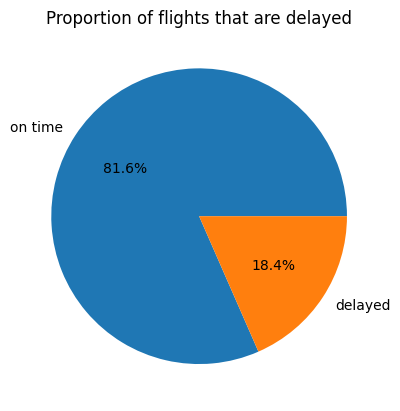

In [5]:
plt.pie(df['DEP_DEL15'].value_counts(), labels=['on time', 'delayed'], autopct='%1.1f%%')
plt.title('Proportion of flights that are delayed')
plt.show()

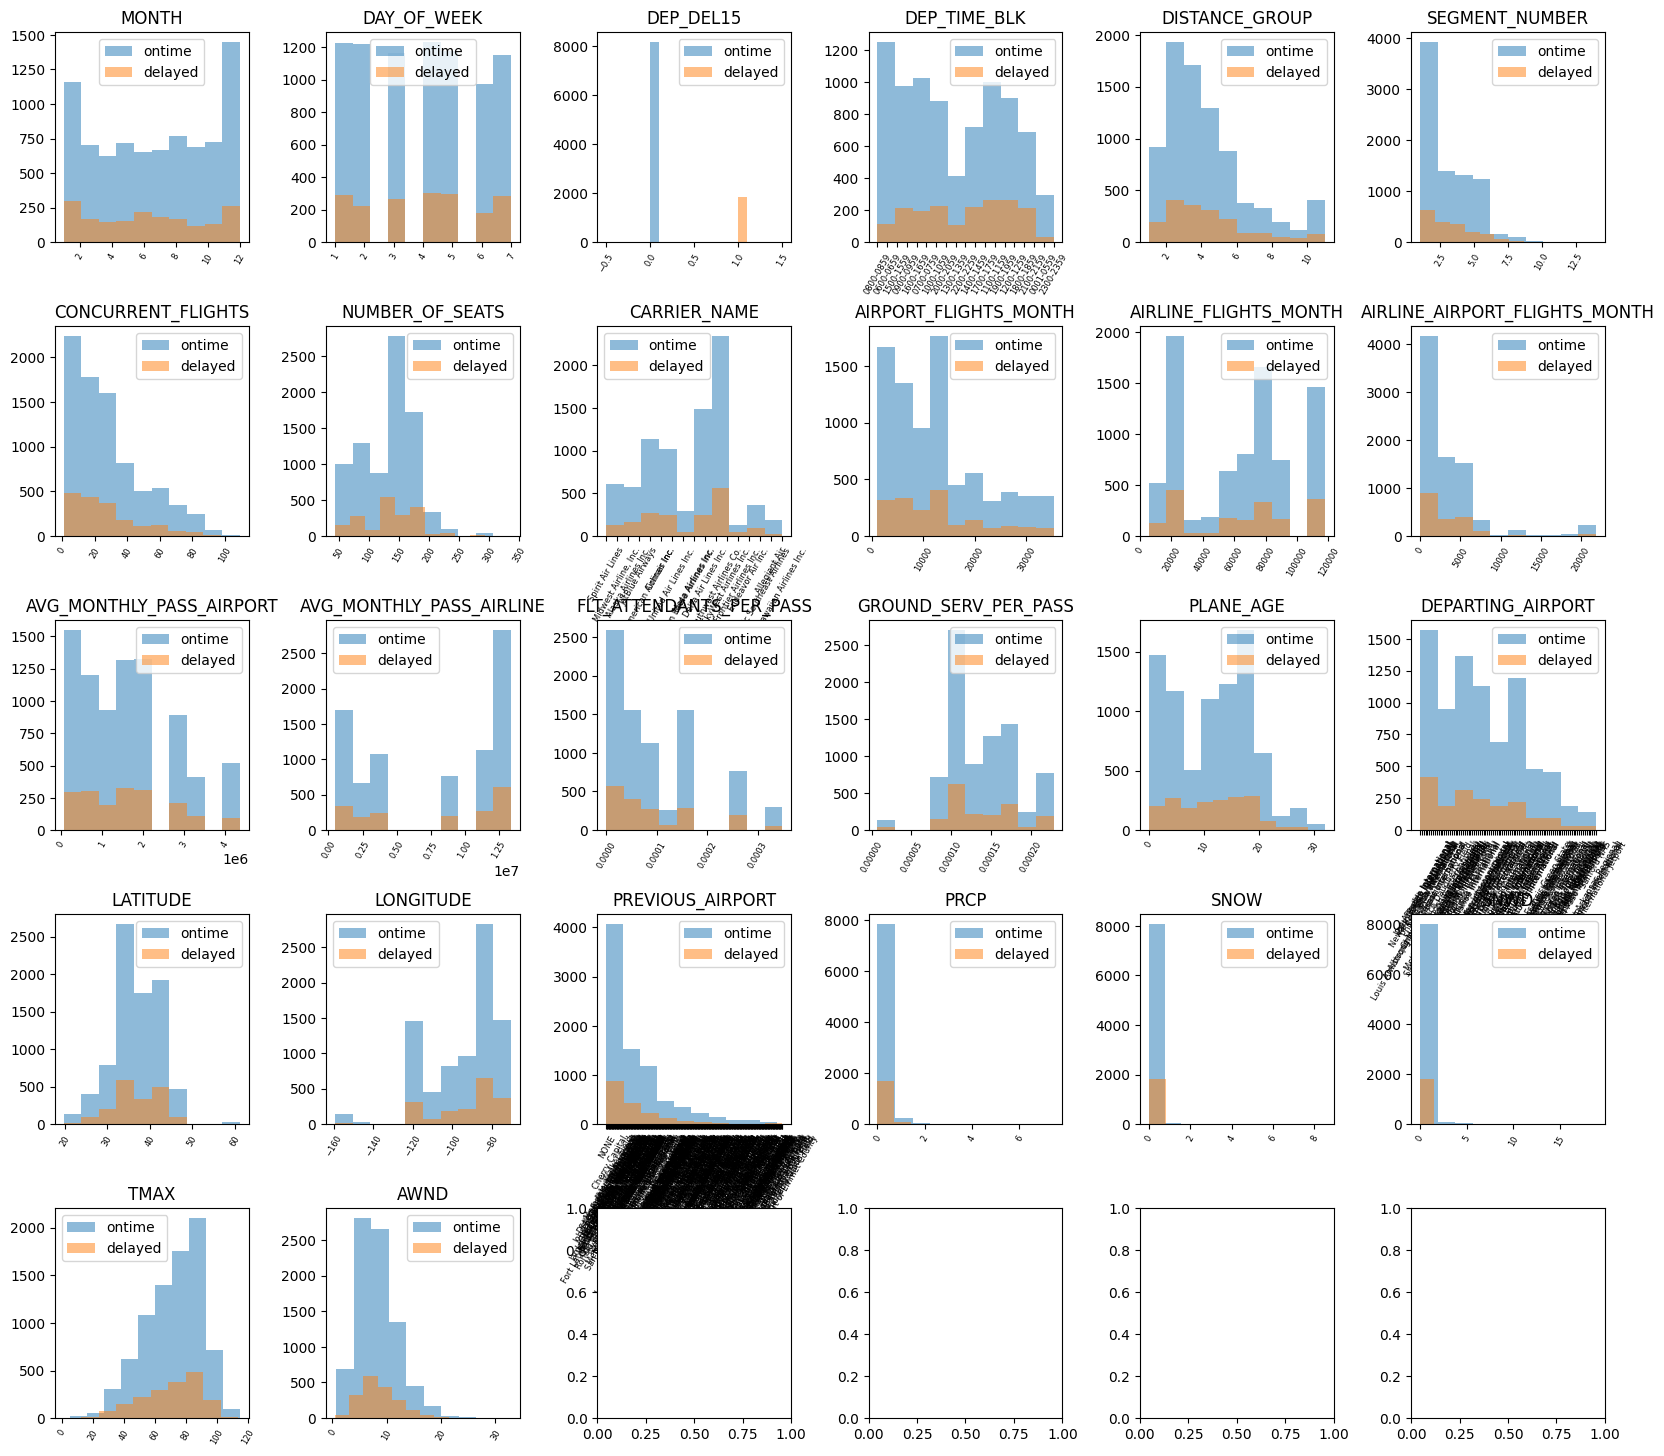

In [6]:
# Inital EDA
# Plot the columns of the ontime and delayed flights and compare, put all the plots in the same figure
# Create a figure with 5 rows and 6 columns which are well spaced
fig, axs = plt.subplots(5, 6, figsize=(20, 18))

for i, col in enumerate(df.columns):
    ax = axs[i // 6, i % 6]
    ax.hist(ontime[col], alpha=0.5, label='ontime')
    ax.hist(delayed[col], alpha=0.5, label='delayed')
    ax.tick_params(axis='x', rotation=60, labelsize=6)
    ax.set_title(col)
    ax.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('flights.png')
plt.show()

In [7]:
# DATA CLEANING
# encode the categorical data
le = LabelEncoder()

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label])
    return df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
df = clean_labels_encoder(list_of_labels, df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
df.fillna(df.mean(), inplace=True)


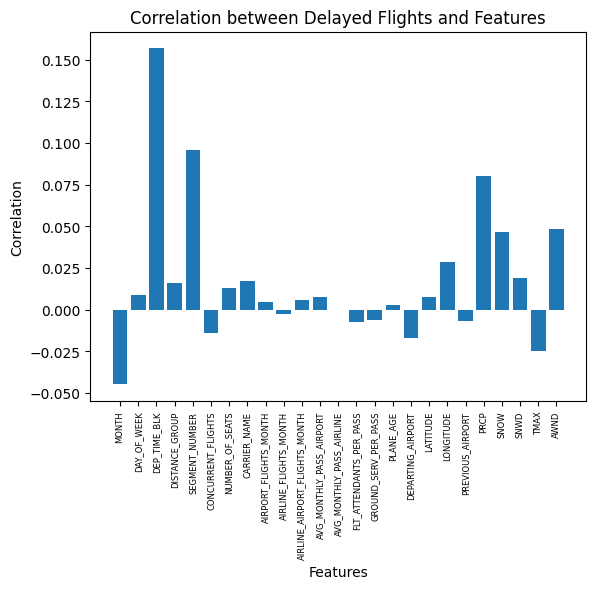

DEP_TIME_BLK                     0.156857
SEGMENT_NUMBER                   0.095753
PRCP                             0.080032
AWND                             0.048450
SNOW                             0.046585
LONGITUDE                        0.028435
SNWD                             0.018792
CARRIER_NAME                     0.017440
DISTANCE_GROUP                   0.015765
NUMBER_OF_SEATS                  0.013346
DAY_OF_WEEK                      0.008841
AVG_MONTHLY_PASS_AIRPORT         0.007520
LATITUDE                         0.007507
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.005761
AIRPORT_FLIGHTS_MONTH            0.004667
PLANE_AGE                        0.002859
AVG_MONTHLY_PASS_AIRLINE        -0.000412
AIRLINE_FLIGHTS_MONTH           -0.002524
GROUND_SERV_PER_PASS            -0.006266
PREVIOUS_AIRPORT                -0.006836
FLT_ATTENDANTS_PER_PASS         -0.007118
CONCURRENT_FLIGHTS              -0.013849
DEPARTING_AIRPORT               -0.016970
TMAX                            -0

In [8]:
# FEATURE ENGINEERING
# Calculate the correlation between DEP_DEL15 and the other columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()['DEP_DEL15']
correlation = correlation.drop(['DEP_DEL15'])


#print(correlation)

# Plot the correlation
plt.bar(correlation.index, correlation)
plt.xticks(rotation=90)
plt.tick_params(axis='x', rotation=90, labelsize=6)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title("Correlation between Delayed Flights and Features")
plt.show()


# Sort the correlation
correlation = correlation.sort_values(ascending=False)
print(correlation)

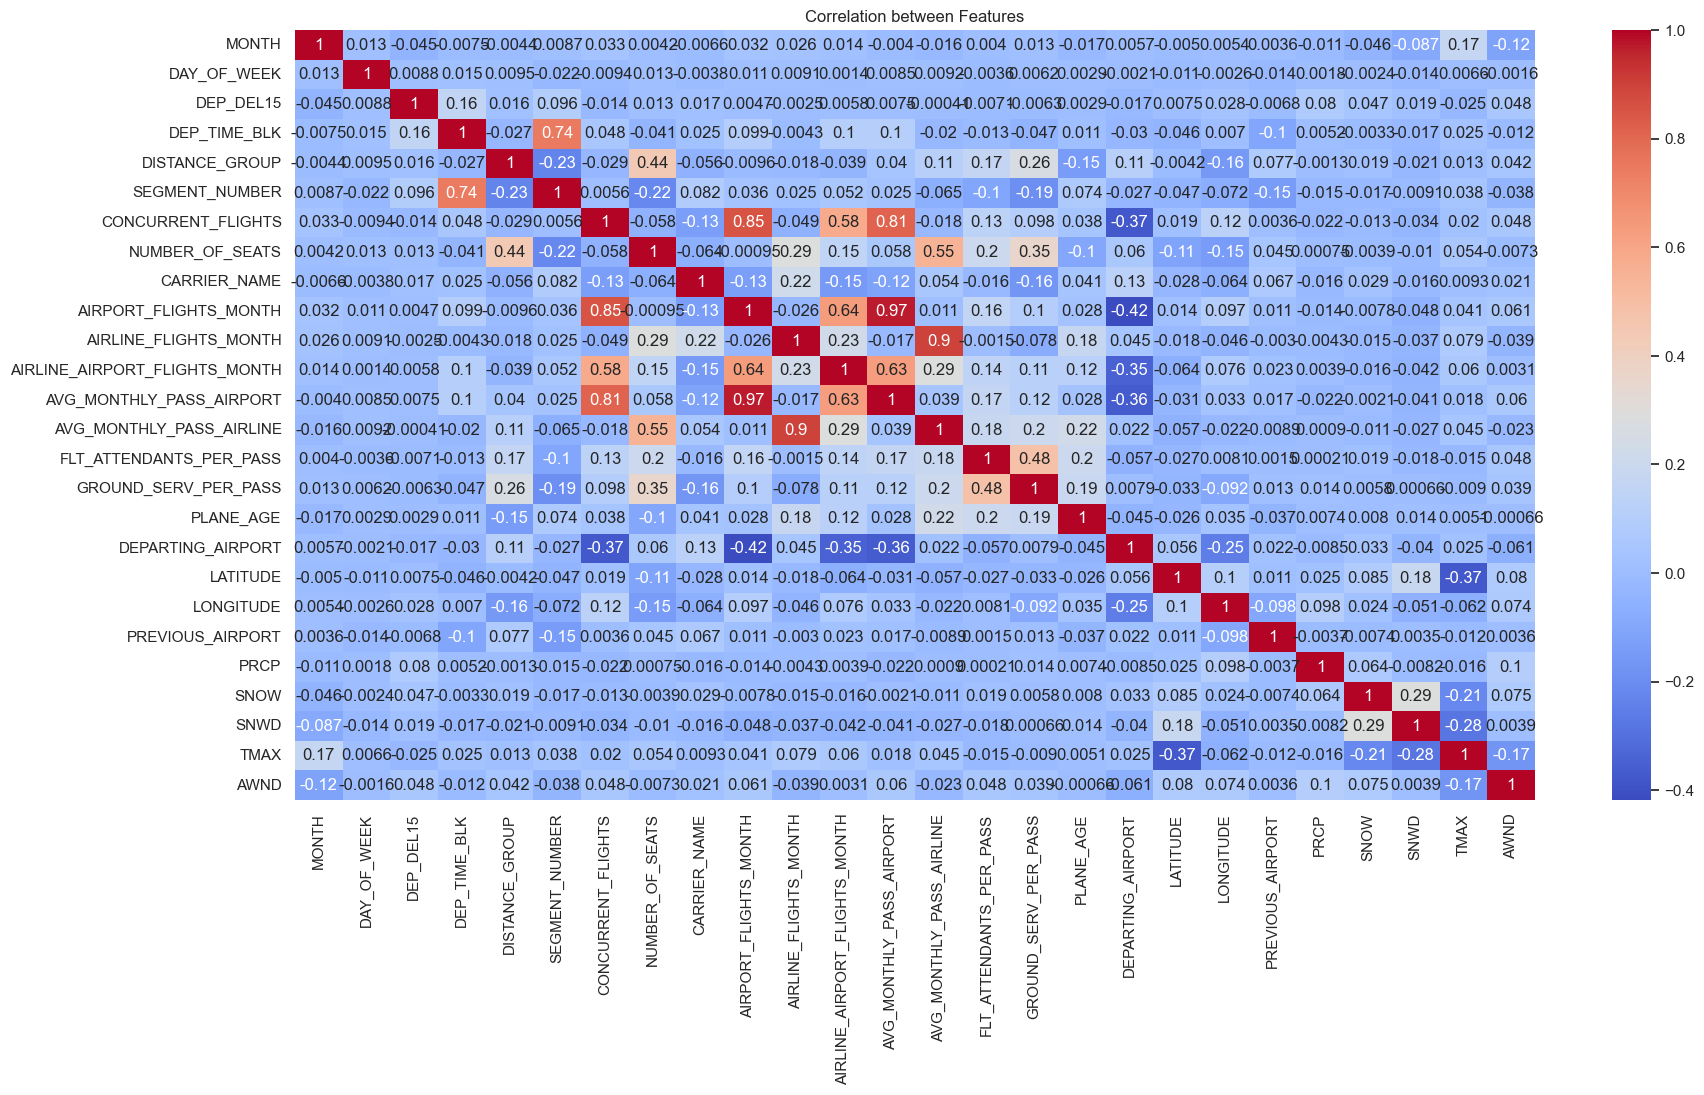

In [9]:
# Plot some heatmaps to see the correlation between the features


def plot_heatmap(df):
    plt.figure(figsize=(20, 10))
    sns.set_theme(style='whitegrid', context='notebook')
    cols = [0, 1, 2]
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    plt.title('Correlation between Features')
    plt.show()

plot_heatmap(df)

0.8195
Cross Validation value is  0.821
[[1630    9]
 [ 352    9]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1639
           1       0.50      0.02      0.05       361

    accuracy                           0.82      2000
   macro avg       0.66      0.51      0.47      2000
weighted avg       0.76      0.82      0.75      2000

0.509719797390139


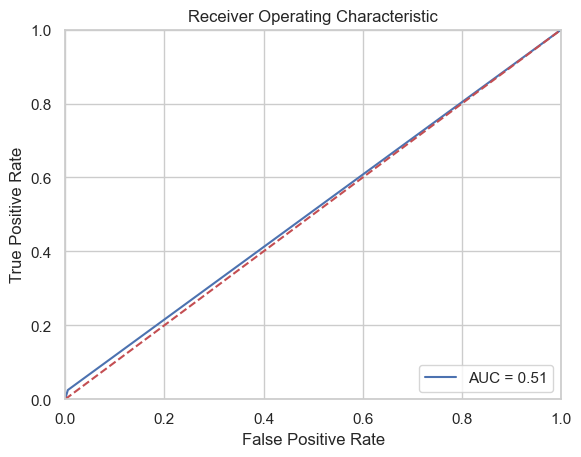

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Split the data into training and testing data
def performTraining(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    rf = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: weights},random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(rf ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performTraining(df)

C:\Users\frase\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\frase\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.7895
Cross Validation value is  0.7975000000000001
[[1556   83]
 [ 338   23]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1639
           1       0.22      0.06      0.10       361

    accuracy                           0.79      2000
   macro avg       0.52      0.51      0.49      2000
weighted avg       0.71      0.79      0.74      2000

0.5065356384120444


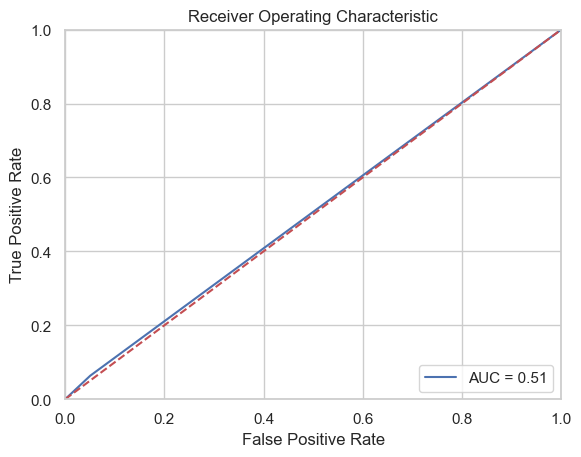

In [11]:
def performKNearest(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performKNearest(df)



0.7075
Cross Validation value is  0.739
[[1344  295]
 [ 290   71]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1639
           1       0.19      0.20      0.20       361

    accuracy                           0.71      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.71      0.71      0.71      2000

0.5083440514197732


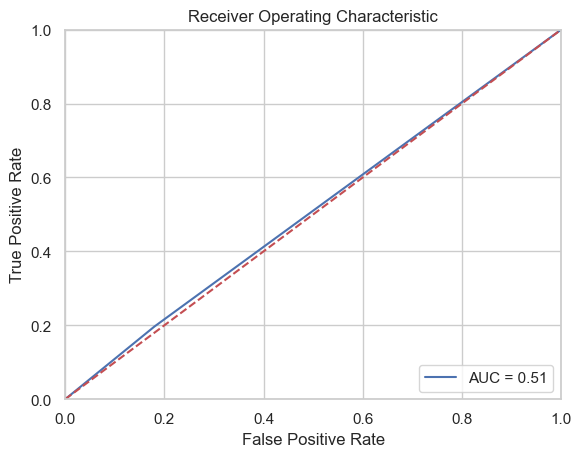

In [12]:
def performSVM(df):
    
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVC(C=1.0, kernel='sigmoid', degree=26, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSVM(df)



0.8195
Cross Validation value is  0.8125
[[1628   11]
 [ 350   11]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1639
           1       0.50      0.03      0.06       361

    accuracy                           0.82      2000
   macro avg       0.66      0.51      0.48      2000
weighted avg       0.76      0.82      0.75      2000

0.5118797523657252


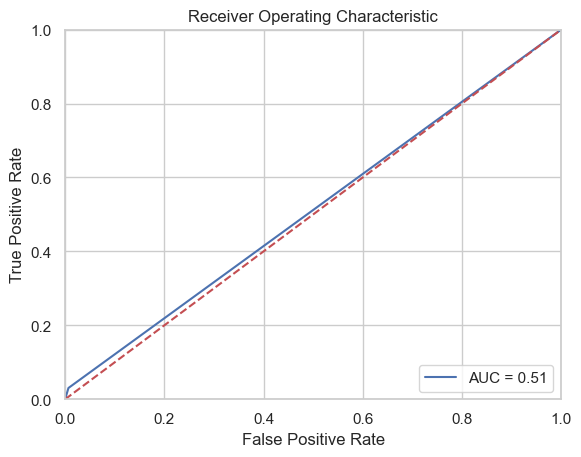

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

def performBoosting(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performBoosting(df)

[LightGBM] [Info] Number of positive: 1482, number of negative: 6518
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501577 -> initscore=0.006307
[LightGBM] [Info] Start training from score 0.006307
0.7175
[LightGBM] [Info] Number of positive: 288, number of negative: 1312
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1657
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492784 -> initscore=-0.028866
[LightGBM] [Info] Start training from score -0.028866
[LightGB

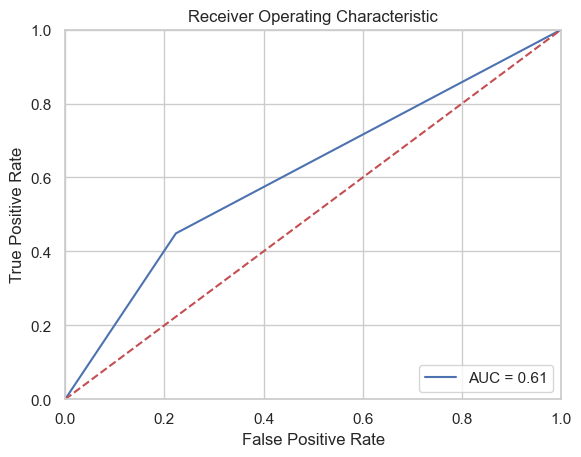

In [14]:
from lightgbm import LGBMClassifier

def performlgbm(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    model = LGBMClassifier(class_weight={0: 1, 1: weights})
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performlgbm(df)


0.8205
Cross Validation value is  0.8219999999999998
[[1626   13]
 [ 346   15]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1639
           1       0.54      0.04      0.08       361

    accuracy                           0.82      2000
   macro avg       0.68      0.52      0.49      2000
weighted avg       0.77      0.82      0.75      2000

0.5168097904438049


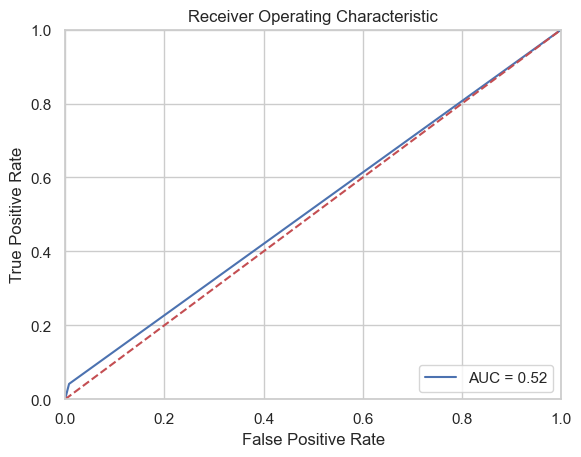

In [15]:
from sklearn.feature_selection import RFE

def performRecursiveFeatureElimination(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = RandomForestClassifier(random_state=42)
    n_features_to_select = 20
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    # model.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)



    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performRecursiveFeatureElimination(df)



In [16]:
from sklearn.linear_model import LogisticRegression

def performRegression(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))


performRegression(df)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.8195


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Cross Validation value is  0.8195
[[1639    0]
 [ 361    0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1639
           1       0.00      0.00      0.00       361

    accuracy                           0.82      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.67      0.82      0.74      2000

0.5


C:\Users\frase\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\frase\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\frase\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: Unde

DEP_DEL15
0    5688
1    5688
Name: count, dtype: int64
0.696
Cross Validation value is  0.8223333333333332
[[1881  588]
 [ 324  207]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2469
           1       0.26      0.39      0.31       531

    accuracy                           0.70      3000
   macro avg       0.56      0.58      0.56      3000
weighted avg       0.75      0.70      0.72      3000

0.5758387050270816


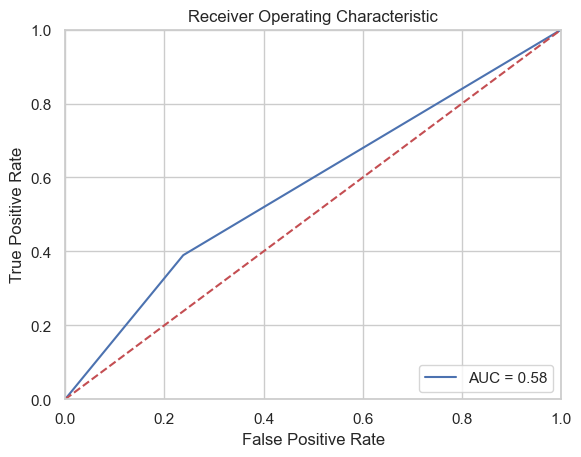

In [ ]:
majority_class = df[df['DEP_DEL15'] == 0]
minority_class = df[df['DEP_DEL15'] == 1]


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def performSMOTE(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(y_train.value_counts())
    model = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=8, criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSMOTE(df)

In [ ]:
from sklearn.utils import resample
temp = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# Separate majority and minority classes
majority_class = temp[temp['DEP_DEL15'] == 0]
minority_class = temp[temp['DEP_DEL15'] == 1]

# Undersample both classes to 5,000 entries each
minority_undersampled = resample(minority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)  # For reproducibility

majority_undersampled = resample(majority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)

# Combine the undersampled classes
balanced_df = pd.concat([minority_undersampled, majority_undersampled])

# Shuffle the resulting dataset (optional, for randomness)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

le = LabelEncoder()

def clean_labels_encoder(list_of_labels, balanced_df):
    for label in list_of_labels:
        balanced_df[label] = le.fit_transform(balanced_df[label])
    return balanced_df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
balanced_df = clean_labels_encoder(list_of_labels, balanced_df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
balanced_df.fillna(balanced_df.mean(), inplace=True)



[LightGBM] [Info] Number of positive: 3987, number of negative: 4013
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498375 -> initscore=-0.006500
[LightGBM] [Info] Start training from score -0.006500
0.6165
[LightGBM] [Info] Number of positive: 811, number of negative: 789
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1684
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506875 -> initscore=0.027502
[LightGBM] [Info] Start training from score 0.027502
[LightGBM

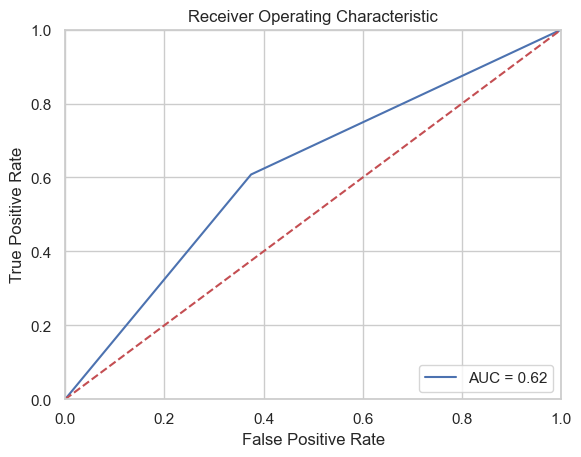

In [ ]:
performlgbm(balanced_df)
